In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
melbourne_data = pd.read_csv("melb_data.csv")
melbourne_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
melbourne_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


c:\Users\acer\.conda\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\acer\.conda\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\acer\.conda\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\acer\.conda\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) inst

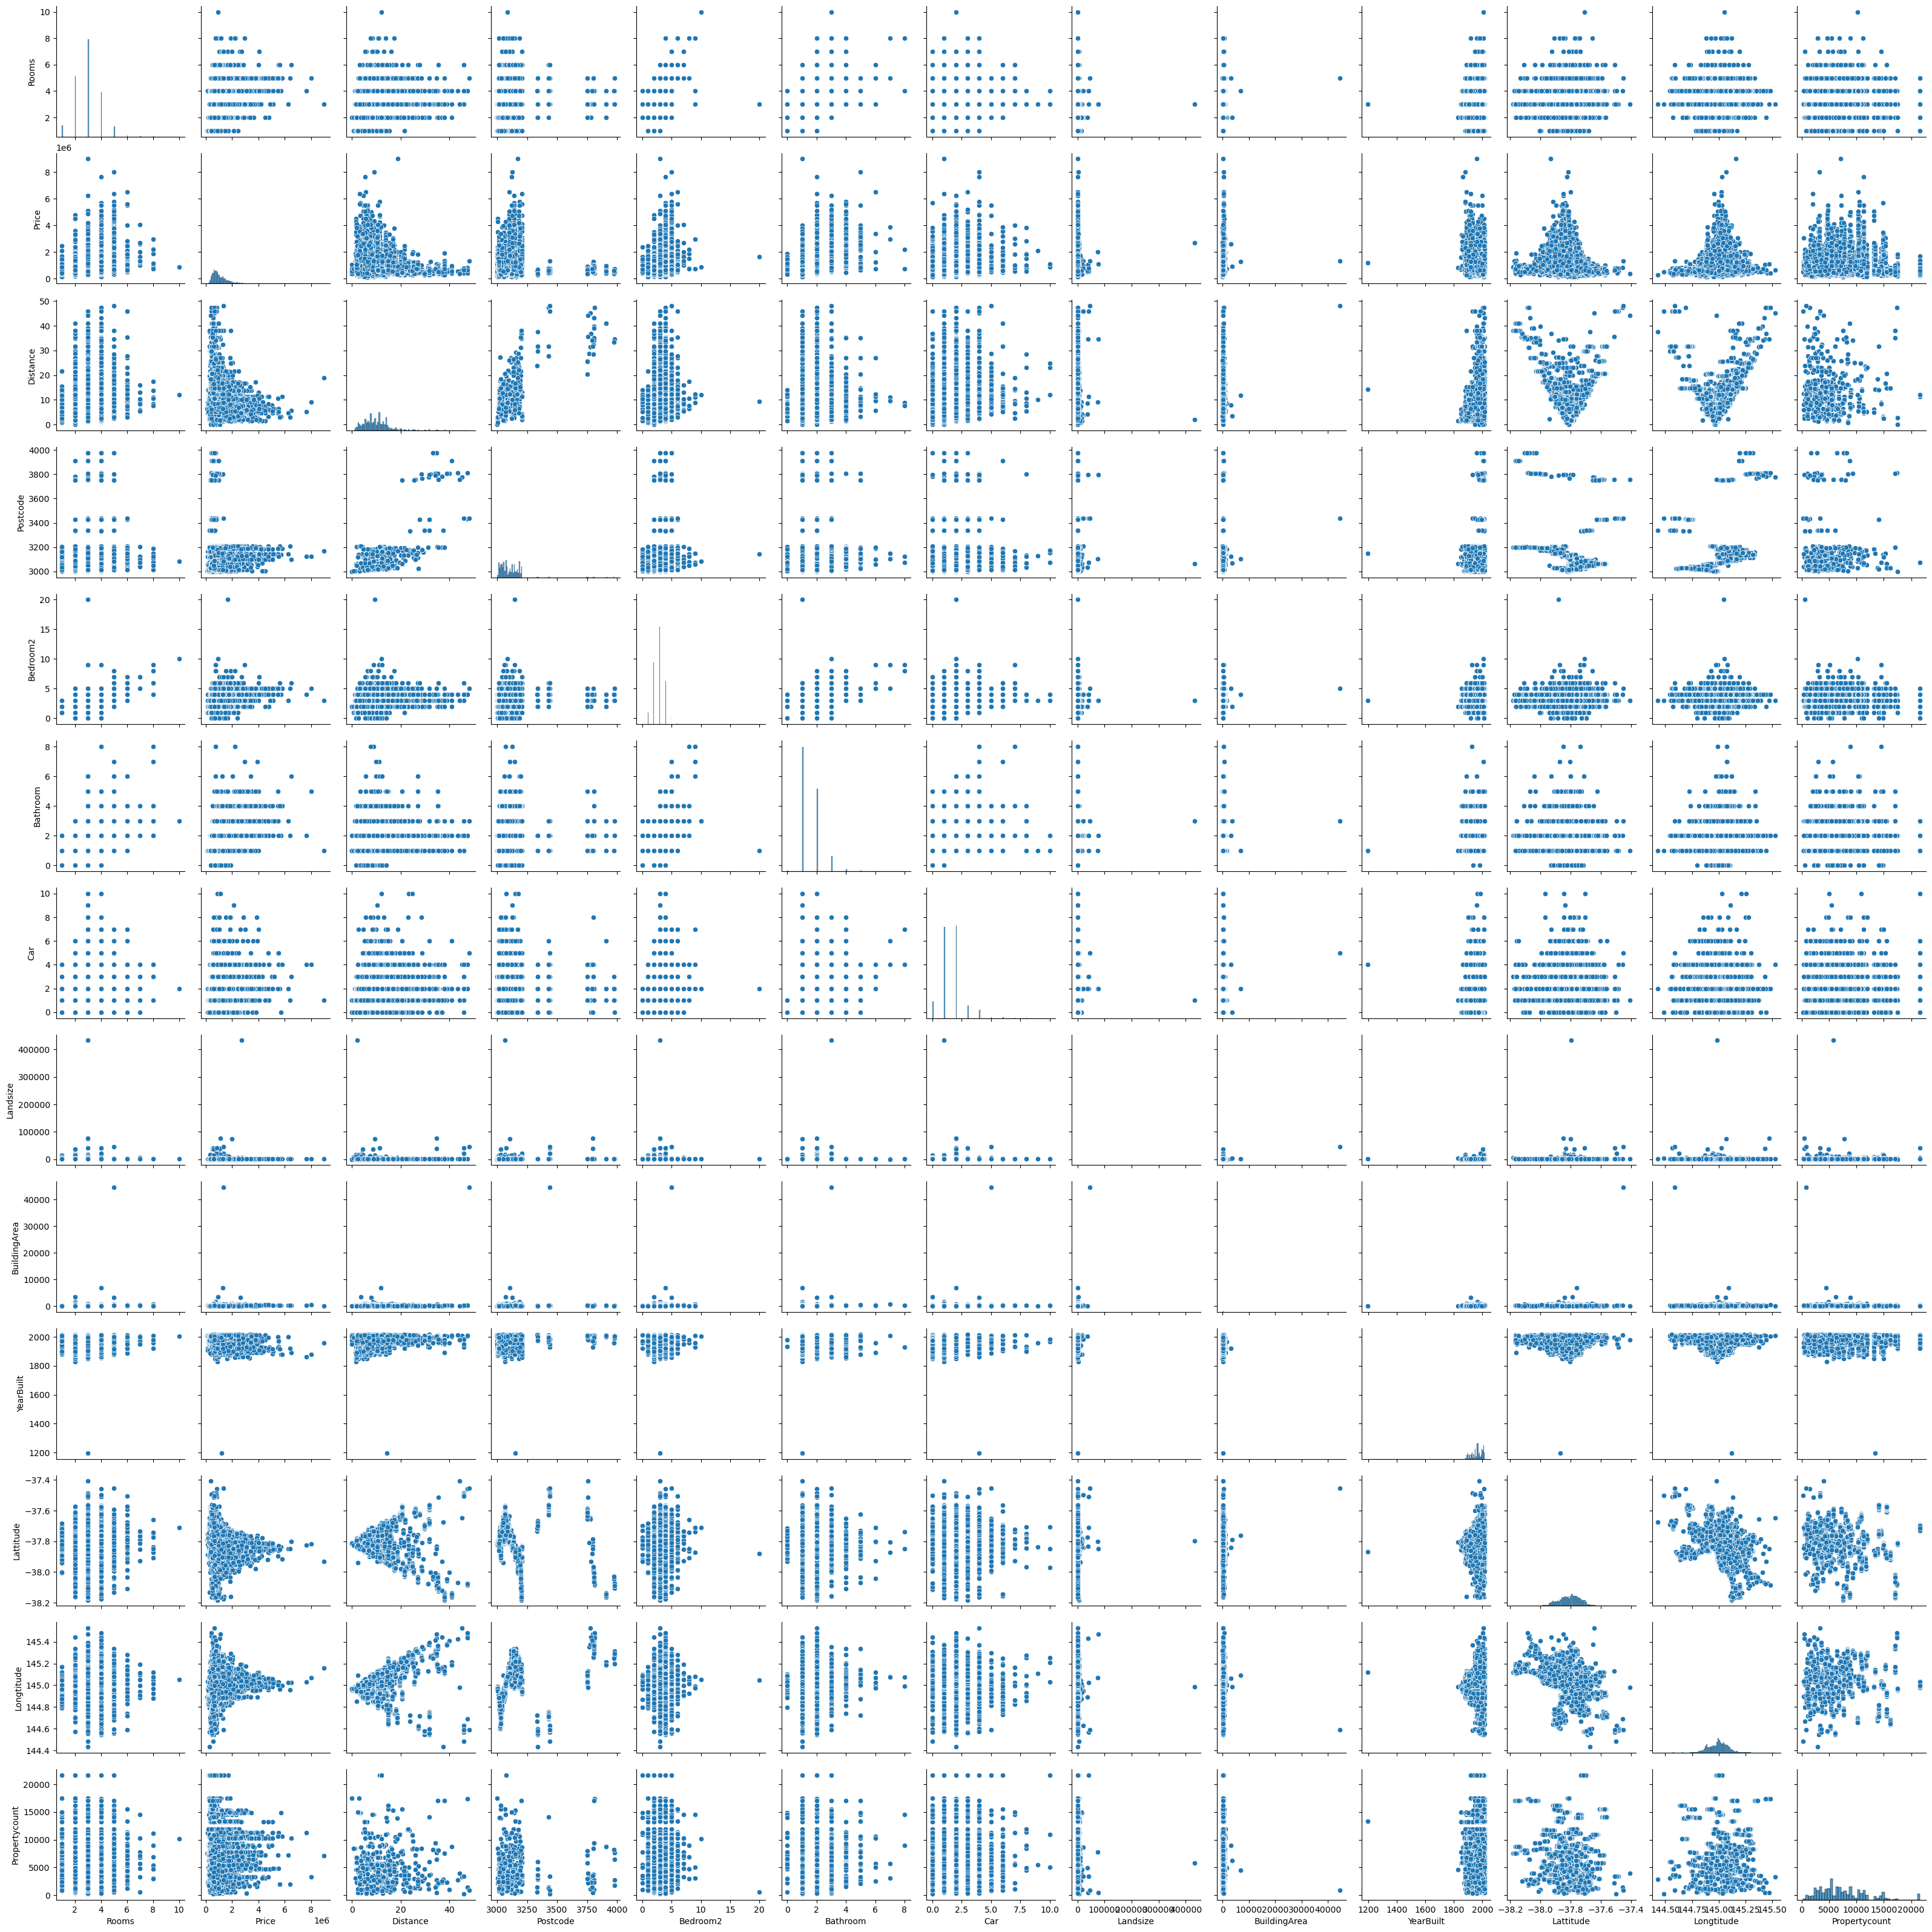

In [4]:
sns.pairplot(melbourne_data)

In [5]:
#To view each columns heading
melbourne_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [6]:
# The Melbourne data has some missing values (some houses for which some variables weren't recorded.) 
# dropna drops missing values (think of na as "not available")
melbourne_data = melbourne_data.dropna(axis=0)

In [7]:
y = melbourne_data.Price
features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude', 'Car', 'BuildingArea']
x = melbourne_data[features]

In [8]:
x.describe()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude,Car,BuildingArea
count,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.576340,471.006940,-37.807904,144.990201,1.573596,141.568645
std,0.971079,0.711362,897.449881,0.075850,0.099165,0.929947,90.834824
min,1.000000,1.000000,0.000000,-38.164920,144.542370,0.000000,0.000000
25%,2.000000,1.000000,152.000000,-37.855438,144.926198,1.000000,91.000000
50%,3.000000,1.000000,373.000000,-37.802250,144.995800,1.000000,124.000000
75%,4.000000,2.000000,628.000000,-37.758200,145.052700,2.000000,170.000000
max,8.000000,8.000000,37000.000000,-37.457090,145.526350,10.000000,3112.000000


In [9]:
x.head()

,Rooms,Bathroom,Landsize,Lattitude,Longtitude,Car,BuildingArea
1,2,1.0,156.0,-37.8079,144.9934,0.0,79.0
2,3,2.0,134.0,-37.8093,144.9944,0.0,150.0
4,4,1.0,120.0,-37.8072,144.9941,2.0,142.0
6,3,2.0,245.0,-37.8024,144.9993,0.0,210.0
7,2,1.0,256.0,-37.8060,144.9954,2.0,107.0


In [10]:
#Building the Model
#Define: What type of model will it be? A decision tree? 
# Some other type of model? Some other parameters of the model type are specified too.
#Fit: Capture patterns from provided data. This is the heart of modeling.
#Predict: Just what it sounds like
#Evaluate: Determine how accurate the model's predictions are.

from sklearn.tree import DecisionTreeRegressor
melbourne_data_model = DecisionTreeRegressor(random_state=1)
melbourne_data_model.fit(x, y)

DecisionTreeRegressor(random_state=1)

In [11]:
#Prediction
print("Making pricing predictions for the following 5 houses:")
print(x.head())
print("The pricing are (in $)")
print(melbourne_data_model.predict(x.head()))

Making pricing predictions for the following 5 houses:
   Rooms  Bathroom  Landsize  Lattitude  Longtitude  Car  BuildingArea
1      2       1.0     156.0   -37.8079    144.9934  0.0          79.0
2      3       2.0     134.0   -37.8093    144.9944  0.0         150.0
4      4       1.0     120.0   -37.8072    144.9941  2.0         142.0
6      3       2.0     245.0   -37.8024    144.9993  0.0         210.0
7      2       1.0     256.0   -37.8060    144.9954  2.0         107.0
The pricing are (in $)
[1035000. 1465000. 1600000. 1876000. 1636000.]


In [12]:
#Model Validation
predictions =  melbourne_data_model.predict(x)
mae = mean_absolute_error(y, predictions)
print('MAE which shows that the model\'s predictions are off by $',mae)

MAE which shows that the model's predictions are off by $ 441.010329244674


In [13]:
#using train test split so some of the data can be used as training data to fit the model
#splitted into trained and validation data
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(x, y, random_state=0)
melbourne_data_model = DecisionTreeRegressor()
melbourne_data_model.fit(train_x, train_y)


DecisionTreeRegressor()

In [14]:
validation_predictions = melbourne_data_model.predict(val_x)
val_mae = mean_absolute_error(val_y, validation_predictions)
print('MAE which shows that the validation data model\'s predictions are off by $', val_mae)


MAE which shows that the validation data model's predictions are off by $ 255560.73402194964


In [15]:
from sklearn.tree import export_text
tree_rules = export_text(melbourne_data_model, feature_names=list(x.columns))
print(tree_rules)

|--- BuildingArea <= 192.50
|   |--- BuildingArea <= 104.70
|   |   |--- BuildingArea <= 74.50
|   |   |   |--- Rooms <= 2.50
|   |   |   |   |--- Rooms <= 1.50
|   |   |   |   |   |--- BuildingArea <= 52.50
|   |   |   |   |   |   |--- BuildingArea <= 38.50
|   |   |   |   |   |   |   |--- Longtitude <= 144.91
|   |   |   |   |   |   |   |   |--- Lattitude <= -37.84
|   |   |   |   |   |   |   |   |   |--- value: [385000.00]
|   |   |   |   |   |   |   |   |--- Lattitude >  -37.84
|   |   |   |   |   |   |   |   |   |--- value: [380000.00]
|   |   |   |   |   |   |   |--- Longtitude >  144.91
|   |   |   |   |   |   |   |   |--- Longtitude <= 145.01
|   |   |   |   |   |   |   |   |   |--- Lattitude <= -37.79
|   |   |   |   |   |   |   |   |   |   |--- Car <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- Car >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   

In [16]:
#Hyperparameter tuning
def get_mae(max_leaf_nodes, train_x, val_x, train_y, val_y):
     # Create a DecisionTreeRegressor model with a specified number of max leaf nodes
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
     # Train the model on the training data
    model.fit(train_x, train_y)
     # Make predictions on the validation data
    predicts_val = model.predict(val_x)
    mae = mean_absolute_error(val_y, predicts_val)
    return(mae)

In [17]:
#compare MAE with differing values of max_leaf_nodes (Hyperparameter tuning)
for max_leaf_nodes in [5, 50, 500, 5000]:
    #get_mae function to get the Mean Absolute Error for the current max_leaf_nodes value
    main_mae = get_mae(max_leaf_nodes, train_x, val_x, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error :  %d" %(max_leaf_nodes, main_mae))

Max leaf nodes: 5  		 Mean Absolute Error :  360330
Max leaf nodes: 50  		 Mean Absolute Error :  277134
Max leaf nodes: 500  		 Mean Absolute Error :  243020
Max leaf nodes: 5000  		 Mean Absolute Error :  254102


In [18]:
#main goal is to improve predictive performance and mitigate overfitting so Random forest is a great choice 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

random_forest_model = RandomForestRegressor(random_state=1)
random_forest_model.fit(train_x, train_y)
melbourne_validation_predicts = random_forest_model.predict(val_x)
mae = mean_absolute_error(val_y, melbourne_validation_predicts)
print('MAE which shows that the validation data model\'s predictions are off by $', mae)

MAE which shows that the validation data model's predictions are off by $ 189304.11081096868


In [19]:
#To check if the model performs well
from sklearn.metrics import r2_score
r2 = r2_score(val_y, melbourne_validation_predicts)
print(r2)

0.7322340838137651


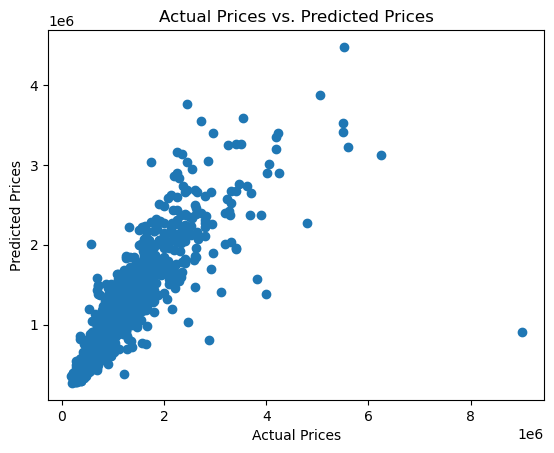

In [20]:
import matplotlib.pyplot as plt

plt.scatter(val_y, melbourne_validation_predicts)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.show()


In [21]:
import pickle

#saving the model using pickle
pickle.dump(random_forest_model, open("C:/Users/acer/Downloads/Data Science/Melbourne Housing Pricing Prediciton/venv/melbourne housing pricing prediction model.pkl", 'wb'))

In [22]:
model_loaded = pickle.load(open("/desktop folder/melbourne housing pricing prediciton model", 'rb'))

In [23]:
import joblib
#saving the model
joblib.dump(random_forest_model, 'Melbourne Housing Pricing Prediction model.joblib.pkl')


['Melbourne Housing Pricing Prediction model.joblib.pkl']